In [3]:
!pip install -q yfinance numpy pandas matplotlib seaborn scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf, os
from sklearn.decomposition import PCA

In [5]:
plt.rcParams["figure.figsize"] = (12, 6)
sns.set_style("whitegrid")
os.makedirs("docs/charts", exist_ok=True)
def save_fig(name):
  plt.savefig(f"docs/charts/{name}.png", dpi=300, bbox_inches="tight")

In [6]:
tickers = ["AAPL","MSFT","AMZN","GOOGL","META","TSLA","JPM","GS","NVDA",
           "NFLX","DIS","V","MA","BA","IBM","XOM","CVX","GE","CAT","WMT"]

START, END = "2015-01-01", "2025-01-01"

px = yf.download(tickers, start=START, end=END)["Close"].dropna()
rets = px.pct_change().dropna()
rets.head()

/tmp/ipython-input-4196206891.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  px = yf.download(tickers, start=START, end=END)["Close"].dropna()
[*********************100%***********************]  20 of 20 completed


Ticker,AAPL,AMZN,BA,CAT,CVX,DIS,GE,GOOGL,GS,IBM,JPM,MA,META,MSFT,NFLX,NVDA,TSLA,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.028172,-0.020517,-0.006926,-0.052787,-0.039972,-0.014613,-0.018356,-0.019054,-0.031223,-0.015735,-0.031045,-0.028128,-0.016061,-0.009196,-0.050897,-0.016890,-0.042041,-0.022074,-0.002910,-0.027362
2015-01-06,0.000094,-0.022833,-0.011778,-0.006434,-0.000463,-0.005304,-0.021545,-0.024679,-0.020229,-0.021566,-0.025929,-0.002161,-0.013473,-0.014677,-0.017121,-0.030318,0.005664,-0.006444,0.007706,-0.005316
2015-01-07,0.014022,0.010600,0.015526,0.015497,-0.000833,0.010230,0.000415,-0.002941,0.014903,-0.006536,0.001526,0.015555,0.000000,0.012705,0.005192,-0.002606,-0.001562,0.013398,0.026532,0.010133
2015-01-08,0.038423,0.006836,0.017682,0.010249,0.022883,0.010342,0.012043,0.003484,0.015965,0.021736,0.022346,0.015554,0.026658,0.029418,0.022188,0.037617,-0.001564,0.013412,0.021106,0.016645
2015-01-09,0.001073,-0.011749,-0.001973,-0.011949,-0.019926,0.004905,-0.013951,-0.012211,-0.015347,0.004355,-0.017387,-0.012744,-0.005628,-0.008405,-0.015458,0.004028,-0.018802,-0.014823,-0.012380,-0.001410


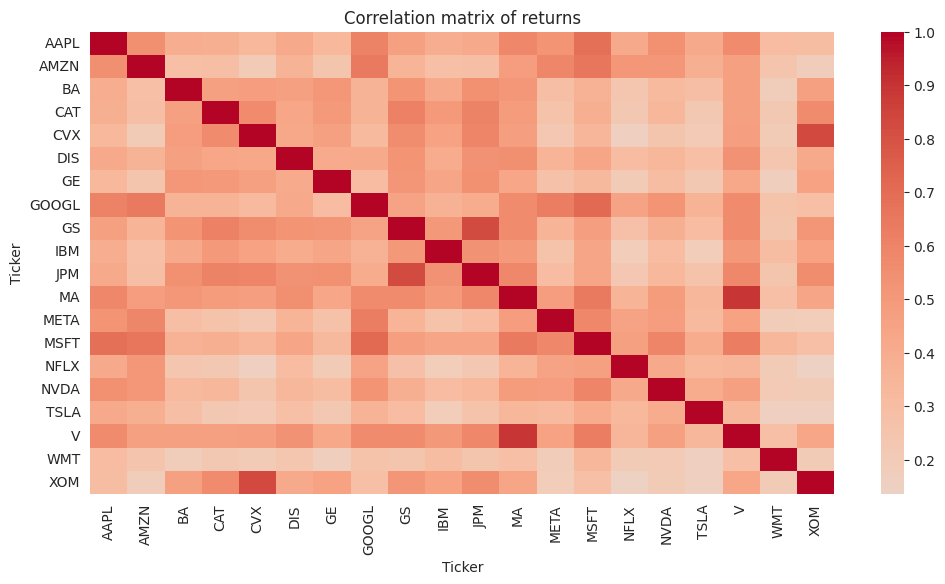

In [16]:
corr = rets.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix of returns")
save_fig("corr_matrix")
plt.show()

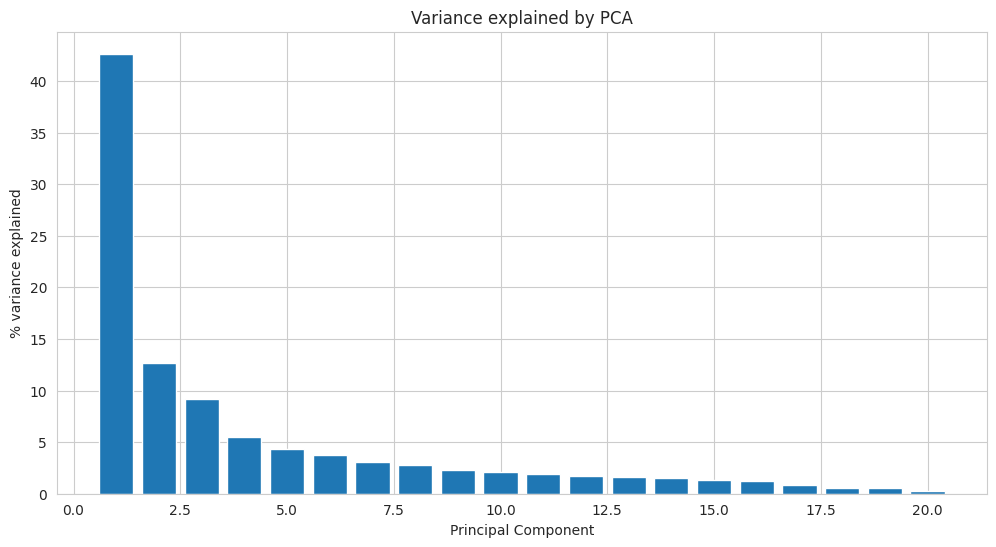

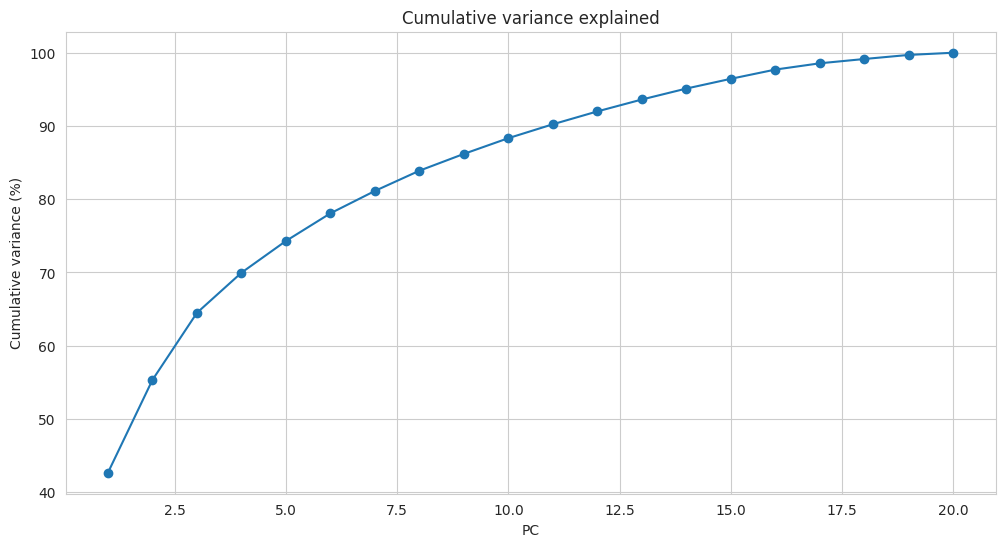

In [8]:
pca = PCA()
pca.fit(rets)

explained_var = pca.explained_variance_ratio_

plt.bar(range(1, len(explained_var) + 1), explained_var * 100)
plt.ylabel("% variance explained")
plt.xlabel("Principal Component")
plt.title("Variance explained by PCA")
save_fig("pca_variance")
plt.show()

cum_var = np.cumsum(explained_var)
plt.plot(range(1, len(cum_var) + 1), cum_var * 100, marker="o")
plt.ylabel("Cumulative variance (%)")
plt.xlabel("PC")
plt.title("Cumulative variance explained")
save_fig("pca_cumvar")
plt.show()

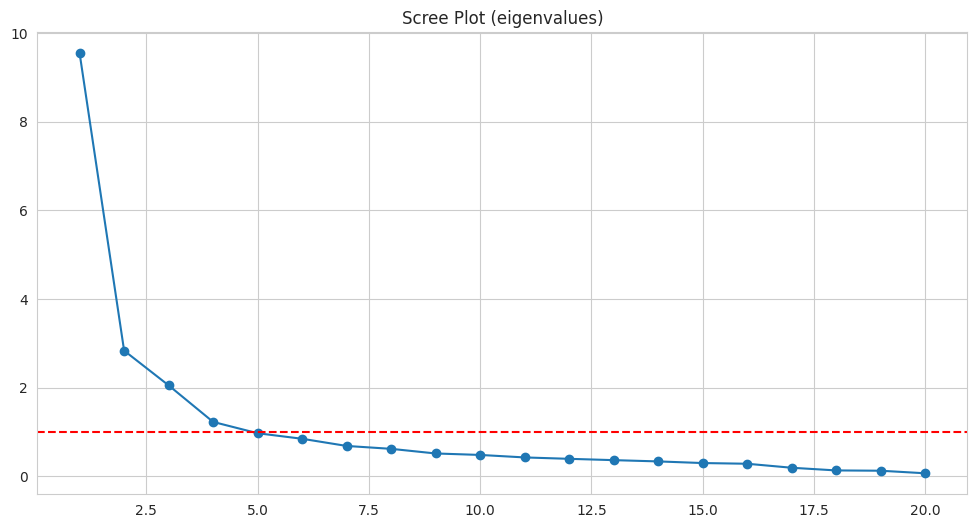

In [9]:
eigs = pca.explained_variance_ * (rets.shape[0] - 1)
plt.plot(range(1, len(eigs) + 1), eigs, marker="o")
plt.axhline(1, color="r", ls="--")
plt.title("Scree Plot (eigenvalues)")
save_fig("scree_plot")
plt.show()

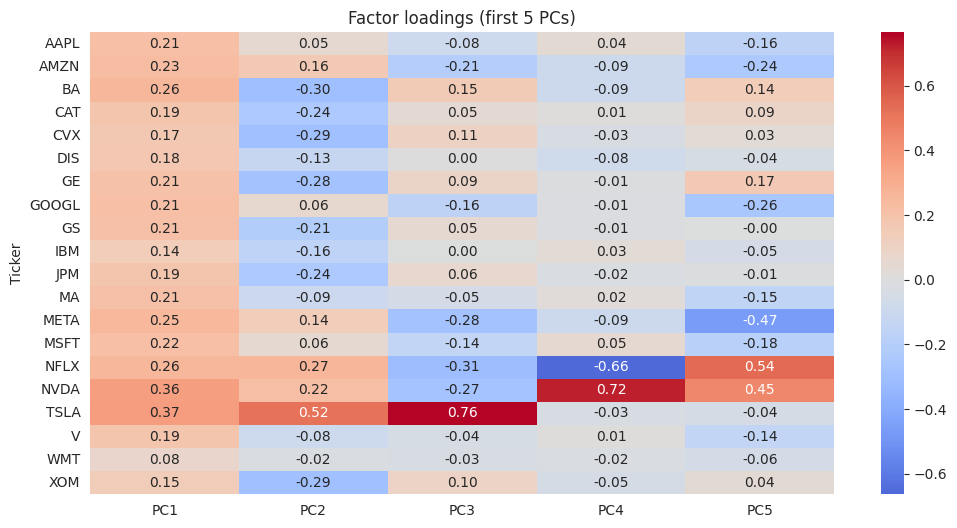

In [10]:
loadings = pd.DataFrame(pca.components_.T, index=rets.columns,
                        columns=[f"PC{i + 1}" for i in range(len(rets.columns))])

sns.heatmap(loadings.iloc[:, :5], cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Factor loadings (first 5 PCs)")
save_fig("pca_loadings")
plt.show()

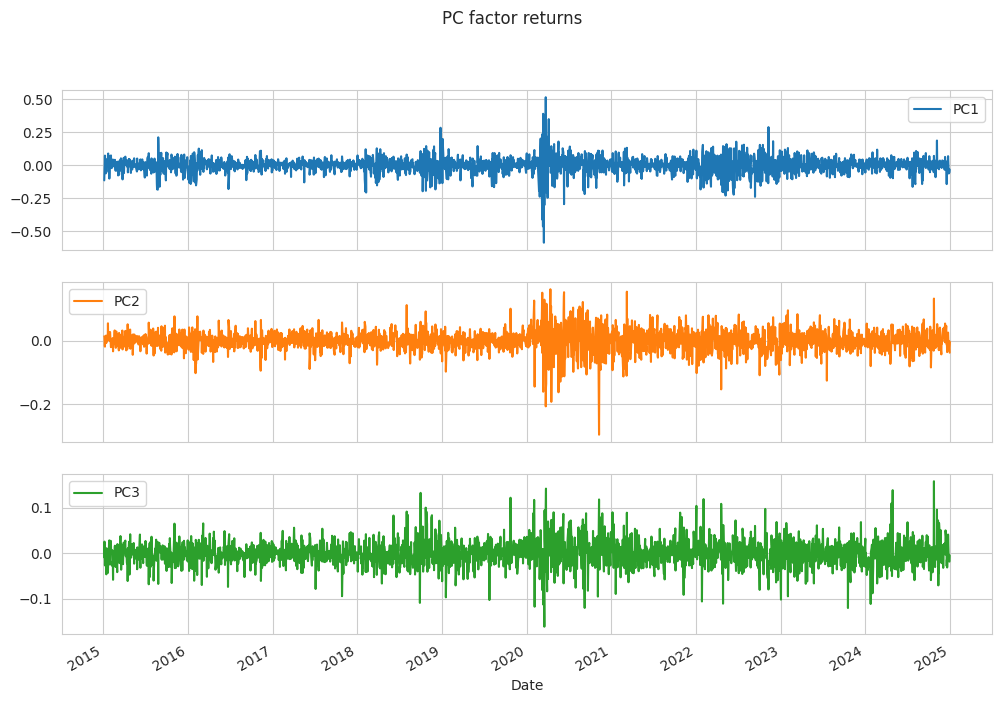

In [11]:
pc_scores = pca.transform(rets)
pc_df = pd.DataFrame(pc_scores, index=rets.index,
                     columns=[f"PC{i + 1}" for i in range(pc_scores.shape[1])])
pc_df[["PC1", "PC2", "PC3"]].plot(subplots=True, figsize=(12, 8), title="PC factor returns")
save_fig("pc_timeseries")
plt.show()

/tmp/ipython-input-4252414766.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (loadings["PC1"][i], loadings["PC2"][i]))


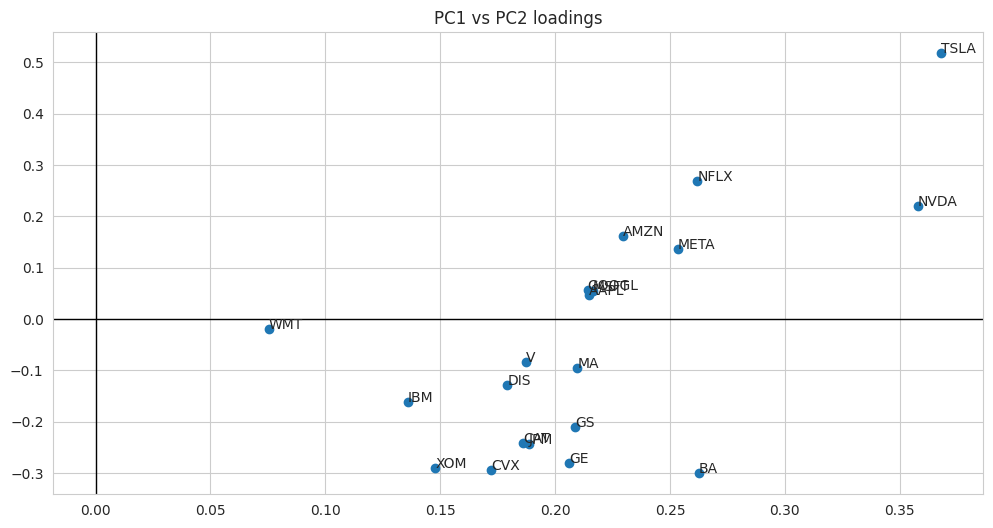

In [12]:
plt.scatter(loadings["PC1"], loadings["PC2"])
for i, txt in enumerate(loadings.index):
  plt.annotate(txt, (loadings["PC1"][i], loadings["PC2"][i]))
plt.axhline(0, color="k", lw=1)
plt.axvline(0, color="k", lw=1)
plt.title("PC1 vs PC2 loadings")
save_fig("pc_scatter")
plt.show()

In [13]:
cov_full = rets.cov().values
k = 3
approx_cov = (pca.components_[:k].T @ np.diag(pca.explained_variance_[:k])
              @ pca.components_[:k])

print("Frobenius norm error:", np.linalg.norm(cov_full - approx_cov))

Frobenius norm error: 0.0009180303227853974


Rotation orthogonality error (||T'T - I||_F): 1.405e-15
Total factor variance (unrotated vs rotated): 11.497042 vs 11.497042


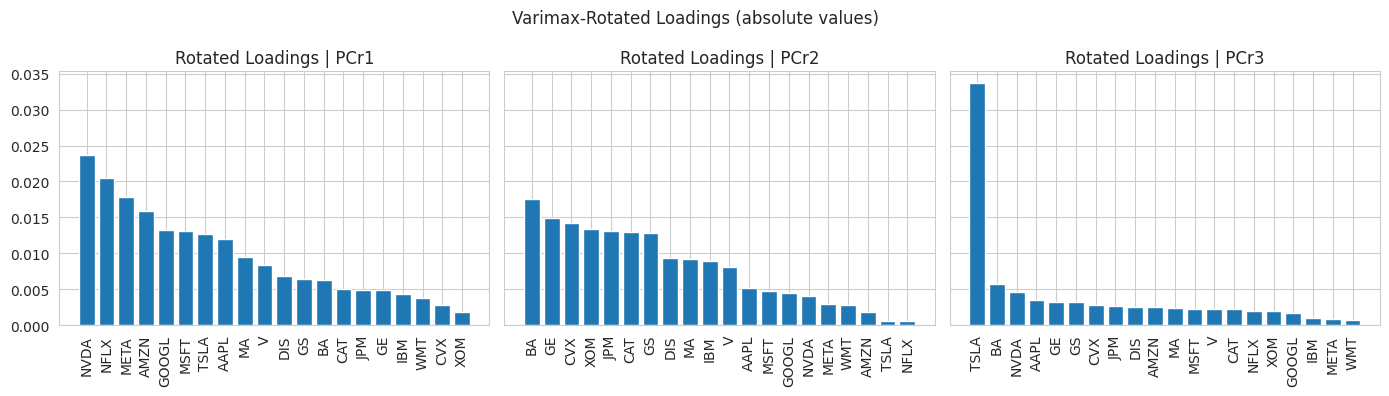

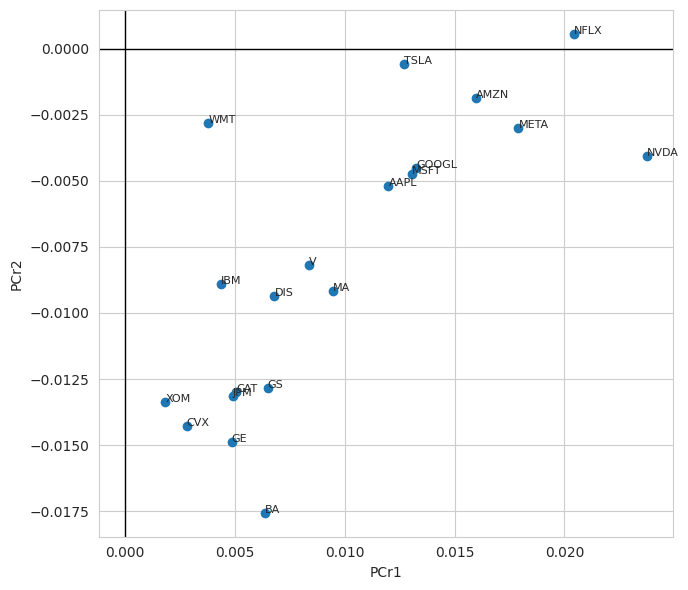

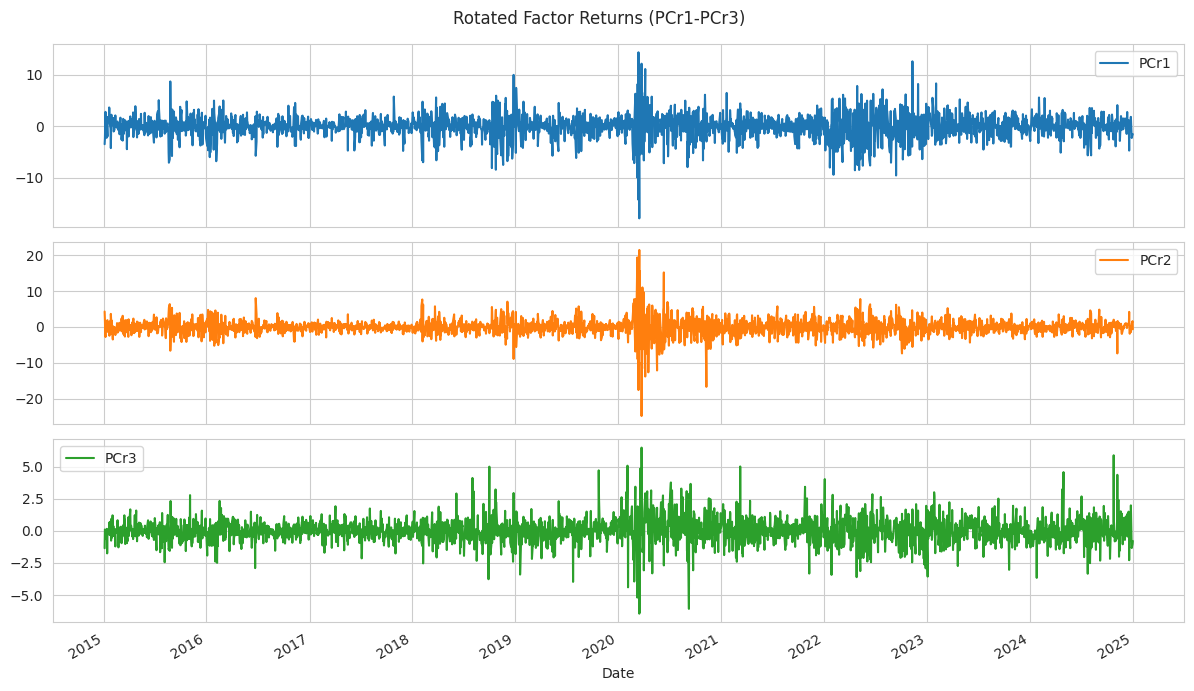

In [14]:
def varimax(Phi, gamma=1.0, q=50, tol=1e-6, verbose=False):
  p, k = Phi.shape
  R = np.eye(k)
  d = 0
  for i in range(q):
    Lambda = Phi @ R
    u, s, vh = np.linalg.svd(
        Phi.T @ (Lambda ** 3 - (gamma / p) * Lambda @ np.diag(np.sum(Lambda ** 2, axis=0)))
    )
    R = u @ vh
    d_old, d = d, np.sum(s)
    if verbose:
      print(f"Iter {i + 1}: objective {d:.6f}")
    if d_old != 0 and (d - d_old) < tol:
      break
  return Phi @ R, R

k = 3

X = rets.values
X_std = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)

eigvals = pca.explained_variance_
V = pca.components_.T
L = V[:, :k] * np.sqrt(eigvals[:k])

L_rot, T = varimax(L, gamma=1.0, q=100, tol=1e-6)

S = X_std @ V[:, :k]
S_rot = S @ T

assets = rets.columns
dates = rets.index
loadings_unrot = pd.DataFrame(L, index=assets, columns=[f"PC{i + 1}" for i in range(k)])
loadings_rot = pd.DataFrame(L_rot, index=assets, columns=[f"PCr{i + 1}" for i in range(k)])
scores_rot = pd.DataFrame(S_rot, index=dates, columns=[f"PCr{i + 1}" for i in range(k)])

orth_err = np.linalg.norm(T.T @ T - np.eye(k))

var_unrot = (S.var(axis=0, ddof=1)).sum()
var_rot = (scores_rot.var(axis=0, ddof=1)).sum()

print(f"Rotation orthogonality error (||T'T - I||_F): {orth_err:.3e}")
print(f"Total factor variance (unrotated vs rotated): {var_unrot:.6f} vs {var_rot:.6f}")

fig, axes = plt.subplots(1, k, figsize=(14, 4), sharey=True)
for j in range(k):
  srt = loadings_rot.iloc[:, j].abs().sort_values(ascending=False)
  axes[j].bar(range(len(assets)), srt.values)
  axes[j].set_xticks(range(len(assets)))
  axes[j].set_xticklabels(srt.index, rotation=90)
  axes[j].set_title(f"Rotated Loadings | PCr{j + 1}")
fig.suptitle("Varimax-Rotated Loadings (absolute values)")
plt.tight_layout()
save_fig("pca_varimax_rotated_loadings")
plt.show()

plt.figure(figsize=(7, 6))
x, y = loadings_rot.iloc[:, 0], loadings_rot.iloc[:, 1]
plt.scatter(x, y)
for name, xi, yi in zip(assets, x, y):
  plt.annotate(name, (xi, yi), fontsize=8)
plt.axhline(0, color="k", lw=1)
plt.axvline(0, color="k", lw=1)
plt.xlabel("PCr1")
plt.ylabel("PCr2")
plt.tight_layout()
save_fig("pca_varimax_pc1_pc2_scatter")
plt.show()

scores_rot.plot(subplots=True, figsize=(12, 7), title="Rotated Factor Returns (PCr1-PCr3)")
plt.tight_layout()
save_fig("pca_varimax_rotated_scores")
plt.show()